# Graph Mining

## 📚 Exercise 1
Complete the function `compute_modularity` to compute the modularity measure of a given graph.

### Goal:
1. Visualizing two graphs using `networkx` (the Karate Club graph is currently commented out in the code)
2. Completing `compute_modularity` function that aims to measure modularity of a given graph

### What you are learning in this exercise:
1. Getting familiar with `networkx` library.
2. Analyzing modularity measure for different graph inputs

#### Hint: you can install `networkx` package by running the following command in a  notebook cell: `!conda install networkx --yes `

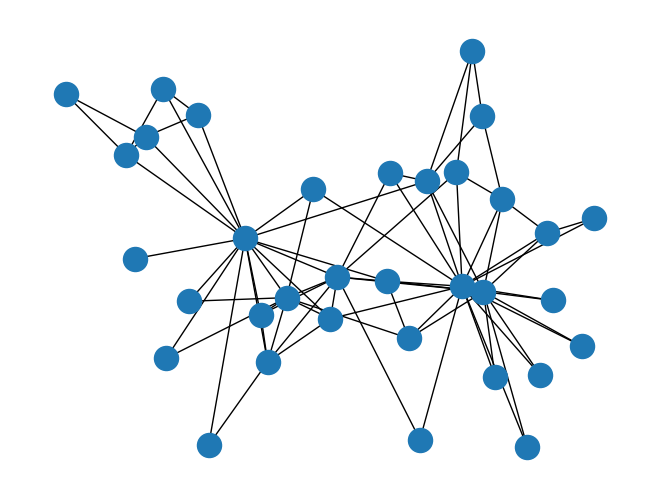

In [9]:
import networkx as nx
import numpy as np

%matplotlib inline

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
#G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
#nx.draw(G)

G = nx.karate_club_graph()
nx.draw(G)

In [10]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1
len(G.edges)

78

In [11]:
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G, nodes_community):
    ''' input: G:nx.Graph 
               nodes_community:{node_id:community_id}
       output: Q (modularity metric)
    '''
    Q = 0
    
    m = len(G.edges)
    for node_i in G.nodes:
        for node_j in G.nodes:
            if nodes_community[node_i] == nodes_community[node_j]:
                Q += G.number_of_edges(node_i, node_j) - G.degree[node_i]*G.degree[node_j]/(2*m)
    Q = Q/(2*m)

    return Q 

In [12]:
nodes_community = {}
for node in G.nodes():
    nodes_community[node] = G.nodes[node]['community']
Q = compute_modularity(G, nodes_community)
print(Q)

KeyError: 'community'

## 📚 Exercise 2
Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.

#### SOLUTION

Following the Girvan- Newman algorithm, first we visit each node X once and compute the number of shortest paths from X to each of the other nodes. To do so, we run BFS starting at node X.

##### Compute Betweenness - Path Counting:

Let’s assume we start from the node E. Label each node by the number of shortest paths that reach it from the root ($N_{shortest}$). So, we label the root with 1. We continue top-down. D and F have one parent so they are labeled by the score of their parent. Similarly for B, A and C. However, G has two parents, thus its label is equal to 2. Finally, we need to calculate for each edge e the fraction of shortest paths from X to Y that go through e, e.g., from E to all other nodes.

![alt text](path.png "Title")

#### Compute Betweenness - Edge Flow:

1. The flow that arrives at every node is 1.
2. In addition each node receives the flow of its children. The flow of its children is distributed over the parents, proportionally to the number of paths that are leading to those parents (previous stage). For example: B: 1 + (1+1) = 3. F = 1 + (½) = 1.5

![alt text](flow.png "Title")

To complete the calculation we need to apply the procedure to every node as the root and sum the contributions. Finally, we need to divide the credit for each edge by 2 since every shortest path is discovered twice, once for each of its endpoints. The final betweenness scores for the edges are the following. 

![alt text](flow2.png "Title")

Thus, we obtain the following clusters for the betweenness of 4 and 6.

![alt text](b4.png "Title")

![alt text](b6.png "Title")
